### Student Information
Name: 林澤基

Student ID: 110062558

GitHub ID: leonkei

Kaggle name: lckleon

Kaggle private scoreboard snapshot:
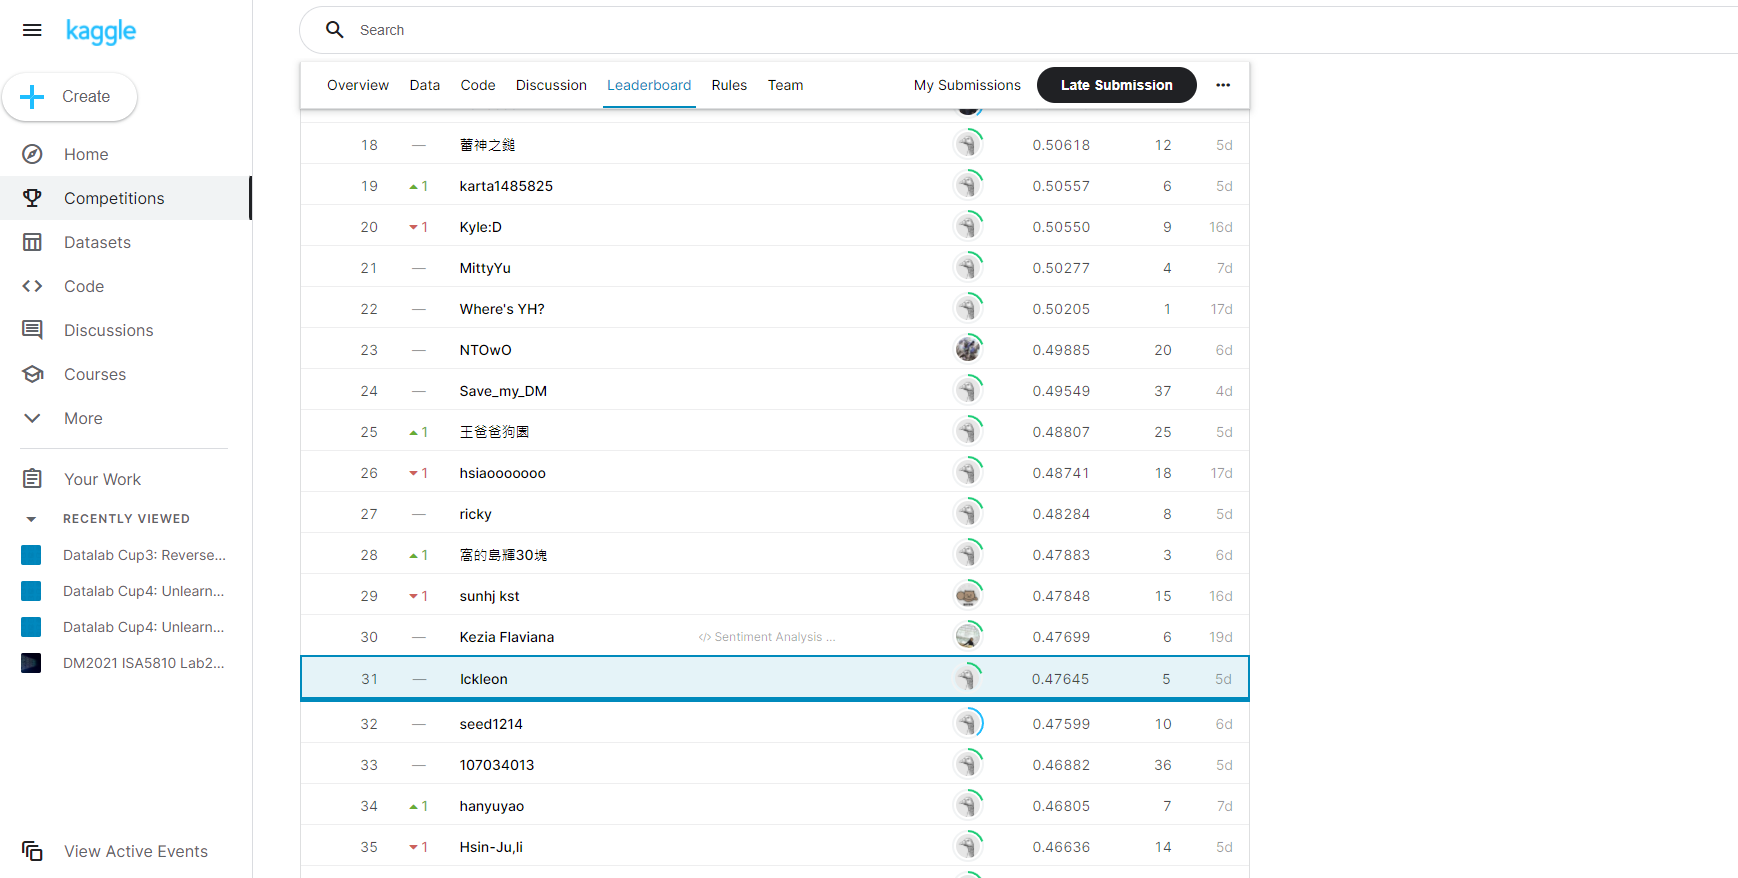


---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# Lab2-Homework

\* <font color="red">Cells in this notebook are commented because those are not use in my final result</font>

\* <font color="red"> Please place all data csvs into a folder called "dm2021-lab2-hw2" </font>

## Dada load & preprocessing

### Import libraries

In [1]:
import csv
import json 
import pandas as pd
import nltk
import re
import numpy as np
import itertools
import time

### Load csvs files into dataframe

In [2]:
df_emotion = pd.read_csv("./dm2021-lab2-hw2/emotion.csv") 
df_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [3]:
file = open('./dm2021-lab2-hw2/tweets_DM.json','r',encoding='utf-8')
tweets = []
count=0
for line in file.readlines():
    dic = json.loads(line)
    tweets.append(dic)
raw_df = pd.DataFrame.from_dict(pd.json_normalize(tweets), orient='columns')
raw_df


,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [4]:
df_id = pd.read_csv('./dm2021-lab2-hw2/data_identification.csv') 
df_id

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [5]:
df = raw_df[["_source.tweet.tweet_id","_source.tweet.text"]]
df = df.set_axis(['tweet_id','tweet_text'],axis=1)
df

,tweet_id,tweet_text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


### Cleaning data
* I've tried two cleanning method try to clean the data
** a. data cleaning
** b. data preprocessing
* Two method both <font color="red">Not working well</font> on training result
* So my final result didn't apply any of them(<font color="red">No data cleaning</font>)

In [7]:
# import pandas as pd
# import numpy as np
# import json
# from collections import Counter
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import re, string, unicodedata
# import nltk
# from nltk import word_tokenize, sent_tokenize, FreqDist
# from nltk.corpus import stopwords
# from nltk.stem import LancasterStemmer, WordNetLemmatizer

# from nltk.tokenize import TweetTokenizer
# import preprocessor as p

In [ ]:
# nltk.download
# nltk.download('wordnet')
# nltk.download('stopwords')

### Data cleaning
* Ex. 
* Before: 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that's <LH>'
* After : 'who post add me on Snapchat must be dehydrate Cuz man that s LH'

In [11]:
# from nltk.stem.wordnet import WordNetLemmatizer 
# lem = WordNetLemmatizer()
# def cleaning(text):
#     txt = str(text)
#     txt = re.sub(r"http\S+", "", txt)
#     if len(txt) == 0:
#         return 'no text'
#     else:
#         txt = txt.split()
#         index = 0
#         for j in range(len(txt)):
#             if txt[j][0] == '@':
#                 index = j
#         txt = np.delete(txt, index)
#         if len(txt) == 0:
#             return 'no text'
#         else:
#             words = txt[0]
#             for k in range(len(txt)-1):
#                 words+= " " + txt[k+1]
#             txt = words
#             txt = re.sub(r'[^\w]', ' ', txt)
#             if len(txt) == 0:
#                 return 'no text'
#             else:
#                 txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
#                 txt = txt.replace("'", "")
#                 txt = nltk.tokenize.word_tokenize(txt)
#                 #data.content[i] = [w for w in data.content[i] if not w in stopset]
#                 for j in range(len(txt)):
#                     txt[j] = lem.lemmatize(txt[j], "v")
#                 if len(txt) == 0:
#                     return 'no text'
#                 else:
#                     return " ".join(txt)
# print("Before cleaning:")
# print(df['tweet_text'][0])
# print("After cleaning:")
# print(cleaning(df['tweet_text'][0]))
# #df['content'] = df['tweet_text'].map(lambda x: cleaning(x))

Before cleaning:
People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that's <LH>
After cleaning:
who post add me on Snapchat must be dehydrate Cuz man that s LH


### Preprocess the data 'tweet_text', save it to 'pre_content' in dataframe.
* Delete '#' in text to keep the hashtag after data cleaning.
* Find the hashtag to 'hashtag' in dataframe.
* Using tweet-preprocessor to preprocessor the data
* reference: https://github.com/s/preprocessor

Before preprocess:<br>
0    People who post "add me on #Snapchat" must be ... <br>
1    @brianklaas As we see, Trump is dangerous to #...<br>
2    Confident of your obedience, I write to you, k...<br>
3                  Now ISSA is stalking Tasha 😂😂😂 <LH><br>
4    "Trust is not the same as faith. A friend is s...<br>
Name: tweet_text, dtype: object<br>
After preprocess:<br>
0  [people, who, post, add, me, on, snapchat, mus...<br>
1  [brianklaas, a, we, see, trump, is, dangerous,...<br>
2  [confident, of, your, obedience, i, write, to,...<br>
3               [now, issa, is, stalking, tasha, lh]<br>
4  [trust, is, not, the, same, a, faith, a, frien...<br>

In [7]:
# df['hashtag'] = df['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [10]:
# df['content'] = df['tweet_text'].map(lambda x: p.clean(x.replace("#","")))

In [22]:
# def preprocess_data(data):
#     #Removes Numbers
#     data = data.astype(str).str.replace('\d+', '')
#     lower_text = data.str.lower()
#     lemmatizer = nltk.stem.WordNetLemmatizer()
#     w_tokenizer =  TweetTokenizer()

#     def lemmatize_text(text):
#         return [(lemmatizer.lemmatize(w)) for w \
#                        in w_tokenizer.tokenize((text))]
#     def remove_punctuation(words):
#         new_words = []
#         for word in words:
#           new_word = re.sub(r'[^\w\s]', '', (word))
#           if new_word != '':
#              new_words.append(new_word)
#         return new_words
#     words = lower_text.apply(lemmatize_text)
#     words = words.apply(remove_punctuation)
#     return pd.DataFrame(words)
# print("Before preprocess:")
# print(df['tweet_text'][:5])
# print("After preprocess:")
# print(preprocess_data(df['tweet_text'].str.replace("#","")[:5]))
# # pre_tweets = preprocess_data(df['content'])
# # df['pre_content'] = pre_tweets

Before preprocess:
0    People who post "add me on #Snapchat" must be ...
1    @brianklaas As we see, Trump is dangerous to #...
2    Confident of your obedience, I write to you, k...
3                  Now ISSA is stalking Tasha 😂😂😂 <LH>
4    "Trust is not the same as faith. A friend is s...
Name: tweet_text, dtype: object
After preprocess:
                                          tweet_text
0  [people, who, post, add, me, on, snapchat, mus...
1  [brianklaas, a, we, see, trump, is, dangerous,...
2  [confident, of, your, obedience, i, write, to,...
3               [now, issa, is, stalking, tasha, lh]
4  [trust, is, not, the, same, a, faith, a, frien...


/tmp/ipykernel_3992120/311149503.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


### Data cleanning : stop words & words segmentation
* Try to remove the stop words(common but not important words)
* Not working well at all

In [14]:
# stop_words = set(stopwords.words('english'))
# df['stop_pre_content'] = df['pre_content'].apply(lambda x: [item for item in \
#                                     x if item not in stop_words])

In [15]:
# from ekphrasis.classes.segmenter import Segmenter
# # segmenter using the word statistics from Twitter
# seg_tw = Segmenter(corpus="twitter")


Reading twitter - 1grams ...
Reading twitter - 2grams ...


/home/hsnl-iot/anaconda3/envs/tf2/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [21]:
# a = []
# def segment_tweet(x):
#     if( x != a):
#         listToStr1 = ' '.join([str(elem) for elem in x])
#         return seg_tw.segment(listToStr1)
        
# df['Segmented#'] = df['hashtag'].apply(lambda x: segment_tweet(x))

In [23]:
df_train = pd.merge(df, df_emotion, on='tweet_id')
df_train

,tweet_id,tweet_text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [24]:
df_test = pd.merge(df,df_id[df_id['identification']=='test'],on="tweet_id")
df_test

,tweet_id,tweet_text,identification
0,0x28b412,"Confident of your obedience, I write to you, k...",test
1,0x2de201,"""Trust is not the same as faith. A friend is s...",test
2,0x218443,When do you have enough ? When are you satisfi...,test
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
4,0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...",test
411968,0x2a980e,"""There is a lad here, which hath five barley l...",test
411969,0x316b80,When you buy the last 2 tickets remaining for ...,test
411970,0x29d0cb,I swear all this hard work gone pay off one da...,test


## To encode the class from string to integer for training

In [25]:
classes = df_emotion['emotion'].unique()
print(classes)
classes_to_index = dict((c, i) for i, c in enumerate(classes))
print(classes_to_index)
index_to_classes = dict((v, k) for k, v in classes_to_index.items())
print(index_to_classes)

['sadness' 'disgust' 'anticipation' 'joy' 'trust' 'anger' 'fear'
 'surprise']
{'sadness': 0, 'disgust': 1, 'anticipation': 2, 'joy': 3, 'trust': 4, 'anger': 5, 'fear': 6, 'surprise': 7}
{0: 'sadness', 1: 'disgust', 2: 'anticipation', 3: 'joy', 4: 'trust', 5: 'anger', 6: 'fear', 7: 'surprise'}


In [26]:
y = df_train['emotion']
y

0          anticipation
1               sadness
2                  fear
3                   joy
4          anticipation
               ...     
1455558             joy
1455559             joy
1455560             joy
1455561             joy
1455562             joy
Name: emotion, Length: 1455563, dtype: object

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(classes)
y_encoded  = le.transform(y)
y_encoded

array([1, 5, 3, ..., 4, 4, 4])

### Text tokenize & padding
* Transform the text into a sequence of integers by keras preprocessing tools.
* add padding to fix the length of the sequence. (length: 50)

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(df["tweet_text"])
token_seq = tokenizer.texts_to_sequences(df.head(10)["tweet_text"])
print(token_seq)
padded_sequences = pad_sequences(token_seq, truncating='post', maxlen=50, padding='post')
print(padded_sequences)

[[60, 62, 556, 1119, 18, 14, 1194, 302, 19, 1, 1210, 134, 216, 2], [1, 53, 31, 76, 203, 9, 2554, 4, 1, 272, 3, 125, 34, 6, 2, 2, 1, 612], [2983, 12, 17, 3680, 5, 943, 4, 8, 952, 16, 8, 41, 42, 109, 70, 104, 5, 376, 1, 50, 730, 100, 117, 5727, 2, 2], [59, 609, 9, 6617, 2450, 934, 2], [365, 9, 28, 3, 218, 53, 225, 6, 310, 9, 146, 8, 365, 1124, 225, 11, 282, 9, 6, 1855, 8371, 1, 2, 2], [1, 1, 1872, 10, 3, 108, 61, 165, 34, 1493, 1, 2, 5036, 1, 57], [92, 332, 14, 183, 5957, 1, 2], [30, 619, 48, 3515, 1, 2], [1, 1, 70, 6210, 20, 120, 2860, 104, 1670, 1422, 62, 4977, 1, 6210, 1503, 2, 1], [32, 42, 8, 24, 325, 32, 20, 8, 3726, 9, 8, 854, 103, 27, 54, 286, 1, 286, 1, 2]]
[[  60   62  556 1119   18   14 1194  302   19    1 1210  134  216    2
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1   53   31   76  203    9 2554    4    1  272    3  125   34   

In [31]:
all_tok_seq = tokenizer.texts_to_sequences(df_train['tweet_text'])
all_padded_seq = pad_sequences(all_tok_seq, truncating='post', maxlen=50, padding='post')
all_padded_seq

array([[  60,   62,  556, ...,    0,    0,    0],
       [   1,   53,   31, ...,    0,    0,    0],
       [  59,  609,    9, ...,    0,    0,    0],
       ...,
       [ 401, 1149,  222, ...,    0,    0,    0],
       [2115, 4610,   33, ...,    0,    0,    0],
       [ 180,    4,   19, ...,    0,    0,    0]], dtype=int32)

## Apply word2vec model
* This method is not working well too, so i comment it.
* Through word2vec model to transform the sentence into vectors.
* Train a Random Forest model and predict the classes
* accuracy is only 0.45792400370713626

In [21]:
# from gensim.models import Word2Vec
# import spacy

In [22]:
# # 讀取 Gensim model 
# model = Word2Vec.load("wiki-lemma-100D-phrase")

# # 讀取 spaCy model，用來lemmatize
# nlp = spacy.load('en_core_web_md', disable=["ner", "parser"])

In [23]:
# import numpy as np
# # Get all words from wiki word2vec model
# model_words = set(model.wv.index_to_key)

# def text2vec_raw(w2vmodel, text):
#     doc = nlp(text)
#     # convert a movie review into vectors
#     text_vecs = [w2vmodel.wv[word.lemma_] for word in doc if word.lemma_ in model_words]
#     # calculate the mean of the vectors and return
#     res =  np.mean(text_vecs, axis = 0)
#     if len(text_vecs) > 1:
#         return res
#     elif len(text_vecs) == 1:
#         return res[0]
#     else:
#         return np.nan


In [25]:
# from tqdm.notebook import tqdm
# tqdm.pandas()

In [26]:
# df['cleaned_text'] = df['stop_pre_content'].progress_apply(lambda x: " ".join(x))

  0%|          | 0/1867535 [00:00<?, ?it/s]

In [27]:
df

,tweet_id,tweet_text,hashtag,content,pre_content,stop_pre_content,cleaned_text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],"People who post ""add me on Snapchat"" must be d...","[people, who, post, add, me, on, snapchat, mus...","[people, post, add, snapchat, must, dehydrated...",people post add snapchat must dehydrated cuz m...
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]","As we see, Trump is dangerous to freepress aro...","[a, we, see, trump, is, dangerous, to, freepre...","[see, trump, dangerous, freepress, around, wor...",see trump dangerous freepress around world lh ...
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],"Confident of your obedience, I write to you, k...","[confident, of, your, obedience, i, write, to,...","[confident, obedience, write, knowing, even, a...",confident obedience write knowing even ask phi...
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],Now ISSA is stalking Tasha <LH>,"[now, issa, is, stalking, tasha, lh]","[issa, stalking, tasha, lh]",issa stalking tasha lh
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[],"""Trust is not the same as faith. A friend is s...","[trust, is, not, the, same, a, faith, a, frien...","[trust, faith, friend, someone, trust, putting...",trust faith friend someone trust putting faith...
...,...,...,...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",When you buy the last tickets remaining for a ...,"[when, you, buy, the, last, ticket, remaining,...","[buy, last, ticket, remaining, show, sell, mix...",buy last ticket remaining show sell mixedfeeli...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,[],I swear all this hard work gone pay off one da...,"[i, swear, all, this, hard, work, gone, pay, o...","[swear, hard, work, gone, pay, one, day, lh]",swear hard work gone pay one day lh
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[],no card left when I wasn't in so I have no ide...,"[no, card, left, when, i, wasnt, in, so, i, ha...","[card, left, wasnt, idea, get, parcel, lh]",card left wasnt idea get parcel lh
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],"Ah, corporate life, where you can date <LH> us...","[ah, corporate, life, where, you, can, date, l...","[ah, corporate, life, date, lh, using, relativ...",ah corporate life date lh using relative anach...


In [28]:
# df['vectors'] = df['cleaned_text'].progress_apply(lambda x: text2vec_raw(model, x))

  0%|          | 0/1867535 [00:00<?, ?it/s]

/home/hsnl-iot/anaconda3/envs/tf2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [47]:
# from sklearn.metrics import accuracy_score

# accuracy_score(y_val_t, clf.predict(X_val_t))

0.45792400370713626

In [96]:
df

,tweet_id,tweet_text,content,pre_content,stop_pre_content,hashtag,Segmented#,vectors
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...","People who post ""add me on "" must be dehydrate...","[people, who, post, add, me, on, must, be, deh...","[people, post, add, must, dehydrated, cuz, man...",[Snapchat],snapchat,"[0.69433093, 0.5914435, 1.2596318, 0.54412204,..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","As we see, Trump is dangerous to around the wo...","[a, we, see, trump, is, dangerous, to, around,...","[see, trump, dangerous, around, world, lh, lh]","[freepress, TrumpLegacy, CNN]",freepress trump legacy cnn,"[0.71001947, 0.10750399, 1.0709206, 0.5404521,..."
2,0x28b412,"Confident of your obedience, I write to you, k...","Confident of your obedience, I write to you, k...","[confident, of, your, obedience, i, write, to,...","[confident, obedience, write, knowing, even, a...",[bibleverse],bible verse,"[0.8387658, 0.39297986, 1.0302457, 0.63313437,..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,Now ISSA is stalking Tasha <LH>,"[now, issa, is, stalking, tasha, lh]","[issa, stalking, tasha, lh]",[],None,"[-0.23049274, 0.5820317, -0.015391445, -0.2614..."
4,0x2de201,"""Trust is not the same as faith. A friend is s...","""Trust is not the same as faith. A friend is s...","[trust, is, not, the, same, a, faith, a, frien...","[trust, faith, friend, someone, trust, putting...",[],None,"[-0.19738899, 1.3339854, 0.580131, 0.45850563,..."
...,...,...,...,...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,When you buy the last tickets remaining for a ...,"[when, you, buy, the, last, ticket, remaining,...","[buy, last, ticket, remaining, show, sell, lh]","[mixedfeeling, butimTHATperson]",mixedfeeling butim tha tperson,"[1.1303209, -1.05674, 0.97010815, 0.14732061, ..."
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,I swear all this hard work gone pay off one da...,"[i, swear, all, this, hard, work, gone, pay, o...","[swear, hard, work, gone, pay, one, day, lh]",[],None,"[1.3141427, -1.3524789, 0.87621397, 0.29845464..."
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,no card left when I wasn't in so I have no ide...,"[no, card, left, when, i, wasnt, in, so, i, ha...","[card, left, wasnt, idea, get, parcel, lh]",[],None,"[0.57643, -0.2635321, 1.6879134, 0.36260152, -..."
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...","Ah, corporate life, where you can date <LH> us...","[ah, corporate, life, where, you, can, date, l...","[ah, corporate, life, date, lh, using, relativ...",[],None,"[0.66386926, 0.03020517, 1.0768362, 0.38484254..."


## split the data into training and validation

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
     all_padded_seq, y_encoded, test_size=0.03, random_state=42)


## Model build
* The nn model that I apply to use is on below.
* Bidirectional LSTM
<div>
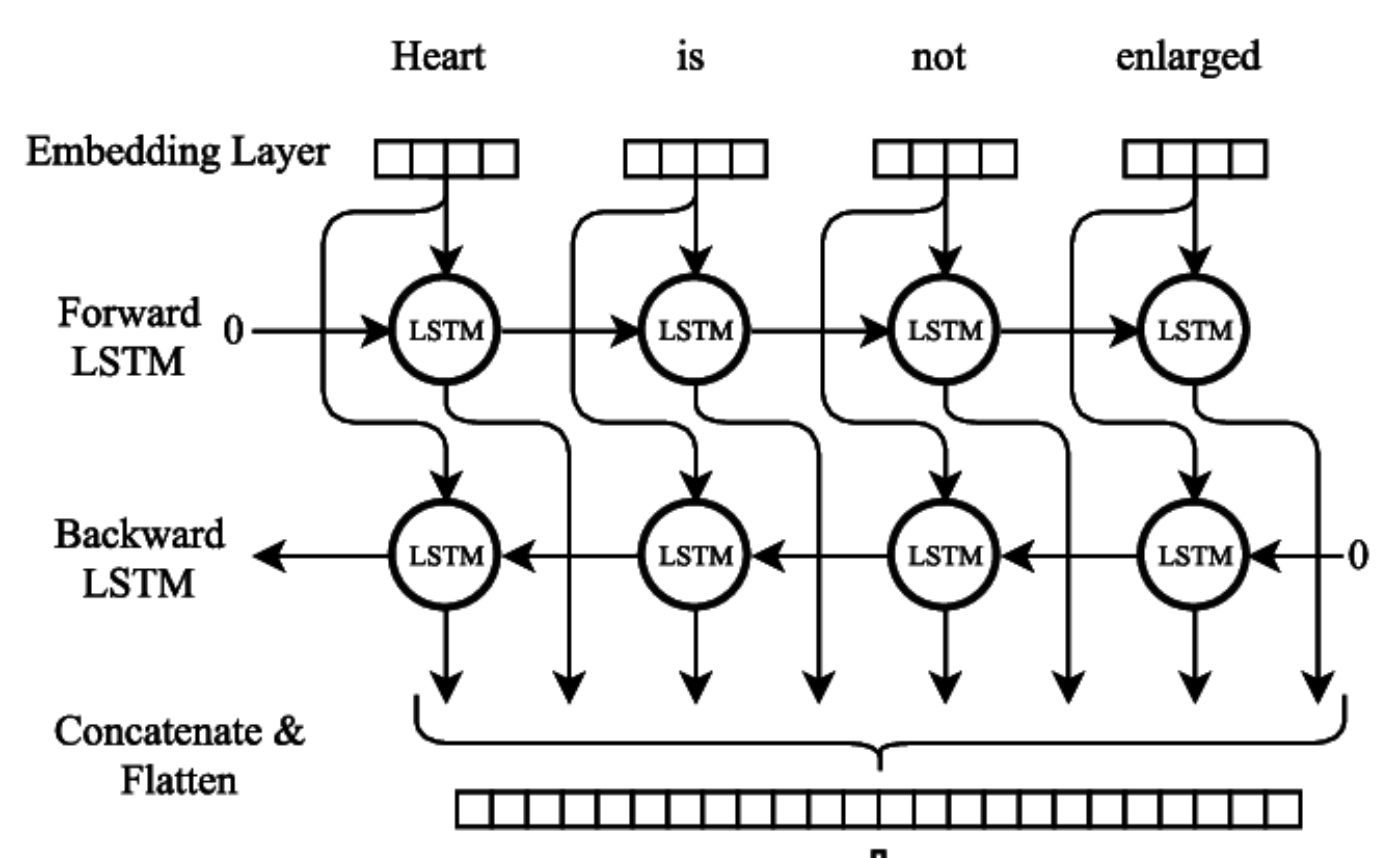
</div>

In [45]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 328       
Total params: 176,008
Trainable params: 176,008
Non-trainable params: 0
_________________________________________________________________


### Train the model with validation data to see validation accuracy.

In [46]:
h = model.fit(
    all_padded_seq, y_encoded,
    validation_data=(X_val, y_val),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/15
45487/45487 [==============================] - 205s 4ms/step - loss: 1.2679 - accuracy: 0.5429 - val_loss: 1.1675 - val_accuracy: 0.5799
Epoch 2/15
45487/45487 [==============================] - 203s 4ms/step - loss: 1.1502 - accuracy: 0.5857 - val_loss: 1.1120 - val_accuracy: 0.6029
Epoch 3/15
45487/45487 [==============================] - 203s 4ms/step - loss: 1.1159 - accuracy: 0.5984 - val_loss: 1.0909 - val_accuracy: 0.6083
Epoch 4/15
11965/45487 [======>.......................] - ETA: 2:27 - loss: 1.0887 - accuracy: 0.6084

KeyboardInterrupt: 

### Train the model by all training data.

In [37]:
h = model.fit(
    all_padded_seq, y_encoded,
    validation_data=(X_val, y_val),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

2022-01-05 18:03:16.742274: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-01-05 18:03:19.266686: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


   11/44122 [..............................] - ETA: 3:54 - loss: 2.0429 - accuracy: 0.3239    

2022-01-05 18:03:19.861271: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


44122/44122 [==============================] - 202s 5ms/step - loss: 1.3030 - accuracy: 0.5299 - val_loss: 1.2315 - val_accuracy: 0.5547
Epoch 2/15
44122/44122 [==============================] - 199s 5ms/step - loss: 1.1937 - accuracy: 0.5694 - val_loss: 1.1949 - val_accuracy: 0.5690
Epoch 3/15
44122/44122 [==============================] - 199s 5ms/step - loss: 1.1605 - accuracy: 0.5817 - val_loss: 1.1830 - val_accuracy: 0.5761
Epoch 4/15
44122/44122 [==============================] - 199s 5ms/step - loss: 1.1431 - accuracy: 0.5881 - val_loss: 1.1793 - val_accuracy: 0.5767
Epoch 5/15
44122/44122 [==============================] - 199s 5ms/step - loss: 1.1315 - accuracy: 0.5924 - val_loss: 1.1824 - val_accuracy: 0.5757
Epoch 6/15
44122/44122 [==============================] - 199s 5ms/step - loss: 1.1232 - accuracy: 0.5955 - val_loss: 1.1798 - val_accuracy: 0.5763


### save the model weight

In [17]:
model.save_weights("hw2_model.h5")

### Plot
* Plot the model training & validation accuracy after training process.

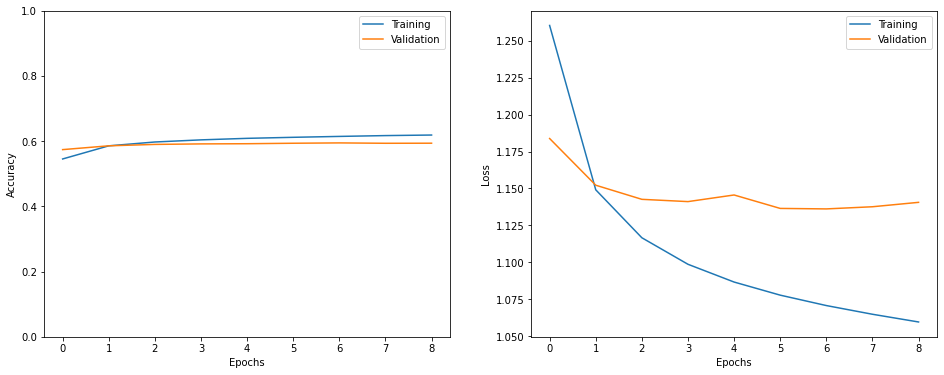

In [18]:
import matplotlib.pyplot as plt
epochs_trained = len(h.history['loss'])
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
plt.ylim([0., 1.])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing
* Predict the testing result and save it as csv file.

In [36]:
df_test

,tweet_id,tweet_text,identification
0,0x28b412,"Confident of your obedience, I write to you, k...",test
1,0x2de201,"""Trust is not the same as faith. A friend is s...",test
2,0x218443,When do you have enough ? When are you satisfi...,test
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
4,0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...",test
411968,0x2a980e,"""There is a lad here, which hath five barley l...",test
411969,0x316b80,When you buy the last 2 tickets remaining for ...,test
411970,0x29d0cb,I swear all this hard work gone pay off one da...,test


In [37]:
test_tok_seq = tokenizer.texts_to_sequences(df_test['tweet_text'])
test_padded_seq = pad_sequences(test_tok_seq, truncating='post', maxlen=50, padding='post')
test_padded_seq

array([[2983,   12,   17, ...,    0,    0,    0],
       [ 365,    9,   28, ...,    0,    0,    0],
       [  32,   42,    8, ...,    0,    0,    0],
       ...,
       [  32,    8,  230, ...,    0,    0,    0],
       [   5, 1205,   27, ...,    0,    0,    0],
       [   1,   48, 1022, ...,    0,    0,    0]], dtype=int32)

In [38]:
y_test=model.predict(test_padded_seq) 
y_test_classes=np.argmax(y_test,axis=1)
y_test_classes

array([7, 1, 4, ..., 1, 0, 5])

In [39]:
y_test_classes_le = le.inverse_transform(y_test_classes)
y_test_classes_le

array(['trust', 'anticipation', 'joy', ..., 'anticipation', 'anger',
       'sadness'], dtype=object)

In [42]:
csv_df = pd.DataFrame(columns=["id",'emotion'])
csv_df['id'] = df_test['tweet_id'].copy()
csv_df['emotion'] = y_test_classes_le
csv_df

,id,emotion
0,0x28b412,trust
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,anticipation
411970,0x29d0cb,anger


In [43]:
csv_df.to_csv('lab2-hw.csv',index=False)

# Summary
In this homework, I transformed the text data into integers sequence and padding it into length 50, then applied those data into a bidirectional LSTM model for training.<br>
From the result, after I have tried many method:<br>
* data cleaning
* data preprocessing
* Universal sentence encoder to replace the embedding layer(the code of this part is deleted, but after i tried the result is lower that do nothing).

Those data preprocessing methods are all lower the result, my assumption is there are some detailed information may delete after data preprocessing are related to the tweet emotions, so do nothing to the data is better.<br>
Less is more.